In [1]:
import os
import numpy as np
from astropy.table import Table, Column

In [2]:
import seaborn as sns
sns.set(context='talk', style='ticks', font_scale=1.6)#, rc=rc) 

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def read_data(camera='decam'):
    ondiskfile = {
        'decam': 'dr8-ondisk-decam-v4.fits', 
        'mosaic': 'dr8-ondisk-mosaic-v3.fits',
        '90prime': 'dr8-ondisk-90prime-v2.fits'
    }
    return Table.read(ondiskfile[camera])

In [5]:
decam = read_data('decam')
mosaic = read_data('mosaic')
prime = read_data('90prime')

In [22]:
set(prime['plver'])

{'V1.0', 'V2.0', 'V2.1', 'V2.2'}

In [6]:
uplver = sorted(set(np.hstack((decam['plver'].data, mosaic['plver'].data, prime['plver'].data))))
print(len(uplver), uplver)

34 [b'V1.0', b'V2.0', b'V2.1', b'V2.2', b'V2.3', b'V3.0', b'V3.0.0', b'V3.0.2', b'V3.1.0', b'V3.1.1', b'V3.1.2', b'V3.10', b'V3.11', b'V3.12', b'V3.2.0', b'V3.3.0', b'V3.4.0', b'V3.5.0', b'V3.5.1', b'V3.5.2', b'V3.5.3', b'V3.6', b'V3.6.1', b'V3.6.2', b'V3.7', b'V3.7.1', b'V3.7.2', b'V3.8', b'V3.9', b'V3.9.1', b'V3.9.2', b'V4.0', b'V4.1', b'V4.2']


In [7]:
def get_nperver(data):
    """Get the number of images with each PLVER."""
    nperver = [np.sum(data['plver'] == ver) for ver in uplver]
    nperver /= np.sum(nperver)
    return nperver

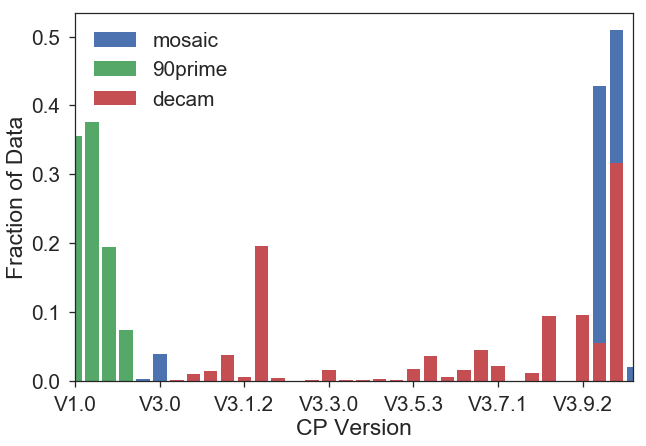

In [28]:
fig, ax = plt.subplots(figsize=(10, 7))
for camera, data in zip(('mosaic', '90prime', 'decam'), (mosaic, prime, decam)):
    nperver = get_nperver(data)
    #print(camera, nperver)
    ax.bar(np.arange(len(uplver)), nperver, label=camera)
ax.set_xlabel('CP Version')
ax.set_ylabel('Fraction of Data')
ax.set_xlim(0, len(uplver)-1)
_ = ax.set_xticklabels([uplver[int(ll)].decode('utf-8') for ll in ax.get_xticks().tolist()[:-1]])
ax.legend()
plt.subplots_adjust(bottom=0.15)
plt.savefig('dr8-plver-distribution.png')
#ax.get_xticks().tolist()
#newlabels = [item.get_text() for item in ax.get_xticklabels()[:-1]]
#print(newlabels)